# Lab NLP for ML

In [34]:
#Brian Conway
#Incomplete, just turning in what I have 

# enable high-res images in notebook 
%config InlineBackend.figure_format = 'retina'

### Q1. 
**For this exercise, we use Hamlet from http://www.gutenberg.org/ebooks/2265 (pg2265.txt)**
* Word Frequency Bar Chart and Word Cloud from Shakespeare's Hamlet
* Using the techniques that we learned in the lecture, create top-20 word frequency bar chart and a word cloud based on Shakespeare's Hamlet - pg2265.txt. Use the mask_oval.png provided in the assignment.

In [35]:
from pathlib import Path

In [36]:
from textblob import TextBlob

In [37]:
## Your code here
text = Path('pg2265.txt').read_text()
blob=TextBlob(text)

In [38]:
## This will be your dataframe's content
from nltk.corpus import stopwords
import pandas as pd
from operator import itemgetter

df = pd.DataFrame(blob) 
stop_words = stopwords.words('english')
items = blob.word_counts.items()
items = [item for item in items if item[0] not in stop_words]
sorted_items = sorted(items, key=itemgetter(1), reverse=True) #access elements at index 1 in each tuple
top20 = sorted_items[0:20]
top20

[('ham', 337),
 ('lord', 211),
 ('haue', 175),
 ('king', 173),
 ('shall', 107),
 ('hamlet', 106),
 ('come', 106),
 ('thou', 105),
 ('let', 104),
 ('good', 99),
 ('hor', 95),
 ('thy', 90),
 ('may', 85),
 ('enter', 85),
 ('oh', 81),
 ('like', 79),
 ('well', 71),
 ('know', 70),
 ('would', 69),
 ('selfe', 68)]

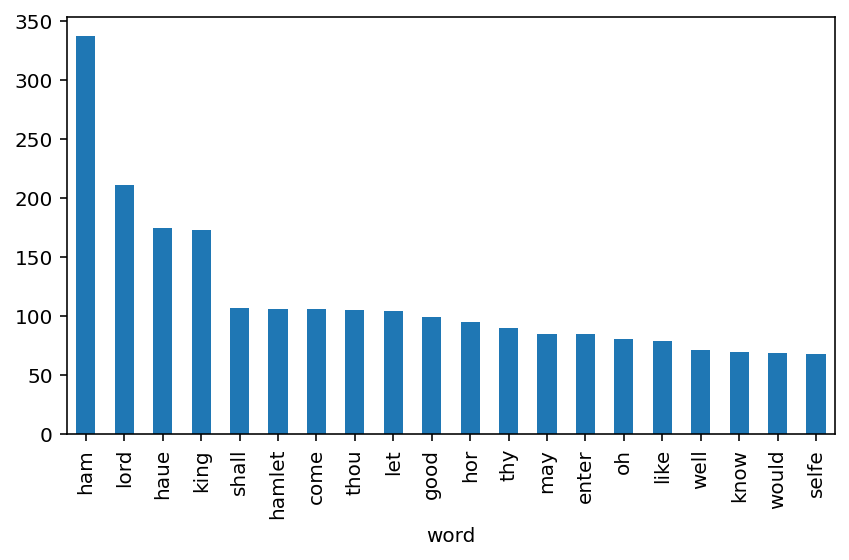

In [39]:
%matplotlib inline
## display bar chart
df = pd.DataFrame(top20, columns=['word', 'count'])  
axes = df.plot.bar(x='word', y='count', legend=False)

import matplotlib.pyplot as plt

plt.gcf().tight_layout()

# Word Cloud
### Q2. 
* Use the wordcloud module to create a word cloud based on the text.

In [40]:
import imageio
from wordcloud import WordCloud   

In [42]:
## your code goes here
mask_image = imageio.imread('mask_oval.png')
wordcloud = WordCloud(width=1000, height=1000, 
    colormap='prism', mask=mask_image, background_color='white')
wordcloud = wordcloud.generate(text)

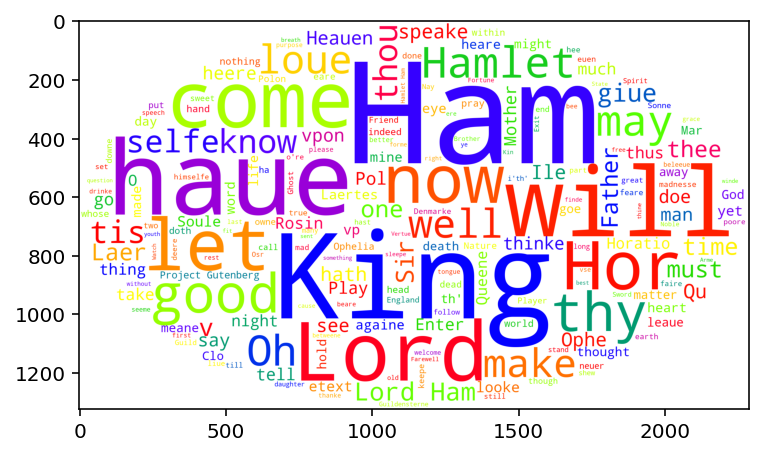

In [45]:
## Output of your code is shown here.
plt.imshow(wordcloud)

# Web Scraping
### Q3. 
* Using the technique we learned, download a web page for a current news article and create a TextBlob. Display the sentiment for the entire TextBlob and for each Sentence.

In [47]:
## Your code goes here
import requests
from bs4 import BeautifulSoup
import nltk
#Checked my favorite sports "journalism" and found the perfect article for this

response = requests.get('https://www.sbnation.com/college-football/2021/12/8/22824426/mark-emmert-toughest-job-america-university-president-here-are-some-harder-jobs')
response.content
soup = BeautifulSoup(response.content, 'html5lib')
text = soup.get_text(strip=True)

blob = TextBlob(text)
print(blob.sentiment)

for sentence in blob.sentences:
    print(sentence.sentiment)

Sentiment(polarity=-0.4907654596056434, subjectivity=0.7955192384051452)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=-0.02500000000000005, subjectivity=0.625)
Sentiment(polarity=0.0, subjectivity=0.0)
Sentiment(polarity=0.06406250000000001, subjectivity=0.31666666666666665)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=-0.3875, subjectivity=0.8125)
Sentiment(polarity=0.2901515151515151, subjectivity=0.5848484848484848)
Sentiment(polarity=-0.46153846153846156, subjectivity=0.9076923076923078)
Sentiment(polarity=-0.75, subjectivity=1.0)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=-0.6454226912636406, subjectivity=0.9141155614647403)
Sentiment(polarity=-0.1, subjectivity=0.0)
Sentiment(polarity=0.0, subjectivity=1.0)
Sentiment(polarity=-0.40972222222222215, subjectivity=0.6388888888888888)
Sentiment(polarity=0.0, subjectivity=0.06666666666666667)
Sentimen

### Q4. 
* TextBlob's **textblob.utils** module offers many utility functions for cleaning up text, which includes **strip_punc** and **lowerstrip**. Call strip_punc with a string and the keyword argument **all=True** to remove punctuation from the string. Call lowerstrip with the string and a keyword argument all=True to get a string of all lowercase letters with whitespaces and punctuation removed. Experiment with each function on "RomeoAndJuliet.txt".

In [55]:
## Your code goes here.


NameError: name 'textblob' is not defined

# spaCy: Similarity Detection
### Q5.
* Using the techniques in the first question, download two news articles in the same topic and compare the similarity. 

**Note:** Many websites obscure the content so you can't pull it programmatically. One way to handle this is to copy the text of an article and paste it into a multiline string using """ as delimiters for the string. 
Insert URLs for current news articles in the `requests.get` calls below. You can use thse articles to experiment computing document similarity. When you are confident, use two articles of your choice to perform similarity detection task.

In [50]:
# From: https://www.foxnews.com/us/hurricane-dorian-flooding-charleston-tornado-carolinas

article1 = """A reinvigorated Hurricane Dorian roared toward the Carolinas on Thursday, bringing tropical storm conditions along the South Carolina coast and flooding in Charleston, along with the threat of tornadoes across the region, including northward into North Carolina.

The National Hurricane Center said as of 9 a.m. that Dorian is a Category 3 storm with maximum sustained winds at 115 mph. Dorian was located about 70 miles south-southeast of Charleston, S.C., and 160 miles south-southwest of Wilmington, N.C., moving north-northeast at 8 mph.

 
A Message from jamesonwhiskey.com

Sponsored Video
"Rain bands from Dorian producing tornadoes across northeastern South Carolina and southeastern North Carolina," the NHC said.

The forecast track of Hurricane Dorian.
The forecast track of Hurricane Dorian. (Fox News)

As of early Thursday, the South Carolina Emergency Management Division said utilities were reporting more than 200,000 power outages statewide. Duke Energy, in a news release Wednesday, said it expected the storm to cause 700,000 outages in the Carolinas and that it brought in resources from 23 states and Canada to respond "as soon as it was safe to do so."

The hurricane was a Category 3 storm Tuesday, then dropped to Category 2 before regaining strength Wednesday night, according to the NHC. Hurricane-force winds were extending outward up to 60 miles from the center, while tropical-storm-force winds were extending outward up to 195 miles.

Hurricane Dorian storm surge, rainfall threaten the Carolinas
Hurricane Dorian storm surge, rainfall threaten the Carolinas
Janice Dean has the latest forecast from the Fox Extreme Weather Center.

"The results of this storm actually have not changed, just the category, which at this point whether it's 2 or 3 doesn't matter, we're still going to get the same results," Fox News Senior Meteorologist Janice Dean said on "Fox & Friends."

HURRICANE DORIAN DEATH TOLL RISES TO 20 IN BAHAMAS AS PM ANNOUNCES HIS BROTHER'S DEATH

Dean said the coastal areas of the Carolinas were always within the forecast cone of the storm when it was still a Category 3 before initially weakening slightly.

"In that situation, you need to know what your surroundings are like if you are dealing with 105 mph winds or 115 mph winds. I mean, that's still a formidable storm," Dean said.

Flooding was reported in Charleston, S.C., early Thursday as Hurricane Dorian neared the area.
Flooding was reported in Charleston, S.C., early Thursday as Hurricane Dorian neared the area.
Hurricane warnings were in effect for the Carolina coasts up to Virginia, with a "potentially life-threatening storm surge" of up to 8 feet around the North Carolina-South Carolina line. Coupled with high tide, the storm's arrival Thursday is expected to push water up the mouths of coastal rivers, causing low-lying areas to flood. Dorian is also forecast to bring 6 to 12 inches of rain for the coastal Carolinas, with isolated cases of up to 15 inches.

High surf and heavy rain were reported in Folly Beach, S.C., as Dorian neared the area.
High surf and heavy rain were reported in Folly Beach, S.C., as Dorian neared the area. (Fox News)

Flash flood warnings were posted in the Charleston, S.C., area until 10:15 a.m. EDT local time, with heavy rain bringing flooding into central parts of the city.

Video posted to Twitter showed floodwaters rising in the downtown area.


Karen Moran
@SweetLulusBaker
 @Live5News Downtown at Huger & Meeting Flooding has started #Dorian #Charleston

 Embedded video
11
7:23 AM - Sep 5, 2019
Twitter Ads info and privacy
See Karen Moran's other Tweets
The Charleston Police Department said that multiple downtown streets were closed early Thursday morning as flooding impacted the area. The city of North Charleston also shared on Twitter where road closures were throughout the region.


North Charleston
✔
@NorthCharleston
 Before #HurricaneDorian, we partnered with @CityCharleston to join their road closure map. Find all road closures for both cities at a single location.http://bit.ly/32ofQJs 

That being said, it's still too dangerous to be out. Stay indoors. This is for future reference. :)

View image on Twitter
16
8:02 AM - Sep 5, 2019
Twitter Ads info and privacy
20 people are talking about this
The Dorchester County Emergency Management Department said on Twitter that conditions were "dangerous throughout the entire county."

South Carolina Highway Patrol Cpl. Gary Miller shared photos of some of the storm's impacts on Twitter.

Dorian caused trees to hang over power lines in South Carolina.
Dorian caused trees to hang over power lines in South Carolina. (SCHP Trooper Gary Miller SCHP/Twitter)

"Trees hanging in power lines and debris covering the roads in many places across Beaufort County, these things are dangerous and Dorian isn’t finished yet! Stay In and have a chill out morning, give the clean up crews time to work after the storm!!" he said.

The South Carolina Highway Patrol's Gary Miller said that debris was covering the roads in any places across Beaufort County.
The South Carolina Highway Patrol's Gary Miller said that debris was covering the roads in any places across Beaufort County. (SCHP Trooper Gary Miller SCHP/Twitter)

Dorian is also creating "widespread" impacts as it neared the Carolinas, according to Dean, including the threat of tornadoes.

"The threat for not only storm surge, heavy rainfall, lightning, but we have tornado-warned storms as well," Dean said on "Fox & Friends. "All of these effects we were anticipating, whether it was a Category 2 or a Category 3."

ALLIGATOR SPOTTED OUT IN HURRICANE: 'GATOR AND #DORIAN MOVING AT SAME SPEED'

In North Myrtle Beach, a small tornado touched down early Thursday, causing minor damage with no injuries reported, according to News13. Video posted to Twitter appears to show the twister.


Wayne White
@NMBchiefsSports
 Out checking on some properties we manage and this happened. @EdPiotrowski @wpdeabc15 @WBTWNews13 @TheWeatherCH @wmbfnews

 Embedded video
953
7:00 AM - Sep 5, 2019 · North Myrtle Beach, SC
Twitter Ads info and privacy
641 people are talking about this
Another tornado was captured on camera further north around 7 a.m. in Pender County outside a fire station, according to the National Weather Service's Wilmington Office.


NWS Wilmington NC
✔
@NWSWilmingtonNC
 Video of a tornado passing near Pender County Fire Station 18 along Highway 17 near Sidbury Rd. Video courtesty of Station 18. Time was around 6:55-7:00 AM EDT Thursday Sept 5, 2019

 Embedded video
6,376
7:25 AM - Sep 5, 2019
Twitter Ads info and privacy
2,643 people are talking about this
CLICK HERE FOR THE FOX NEWS APP

Another waterspout was seen off Emerald Isle in North Carolina around 9 a.m., according to the NWS Newport/Morehead.


NWS Newport/Morehead
✔
@NWSMoreheadCity
 A waterspout off Emerald Isle. This was around 9 AM, Bogue Inlet Pier courtesy @surfline #dorian Please seen an interior room if you are under a Tornado WARNING along the Crystal Coast!

View image on Twitter
191
9:06 AM - Sep 5, 2019
Twitter Ads info and privacy
140 people are talking about this
In North Carolina, Gov. Roy Cooper warned residents to adhere to evacuation orders and finish last-minute storm preparation.

A federal state of emergency was issued in North Carolina. Nearly 8,000 troops across Florida, Georgia, South Carolina and North Carolina and nearly 400 North Carolina National Guard soldiers are also positioned in armories across the state.

Hurricane Dorian: National Hurricane Center update on latest track, conditions
Hurricane Dorian: National Hurricane Center update on latest track, conditions
National Hurricane Center Director Ken Graham has the latest maps and scenarios for the Carolinas on 'America's Newsroom.'

The state’s medical examiner’s office announced the first storm-related fatality in North Carolina. An 85-year-old man in Columbus County died Monday after falling off a ladder while preparing his house for the arrival of Hurricane Dorian.

“We really are very sorry about that and thinking about his family. It reminds us that preparations for storms can really be a dangerous activity,” Cooper said, according to Raleigh's The News & Observer. He warned residents to take caution when boarding up windows and carrying out other measures to prepare for the storm.

Fox News' Melissa Leon and The Associated Press contributed to this report. 
"""

In [51]:
# From https://www.bbc.com/news/world-us-canada-49588680
article2 = """Hurricane Dorian lashes US as Bahamas counts cost
4 hours ago
Share this with Facebook Share this with Messenger Share this with Twitter Share this with Email Share
Related TopicsHurricane Dorian

Media captionResidents in the Bahamas say "it's total devastation"
Hurricane Dorian is expected to bring "life-threatening storm surges" up the US east coast after causing destruction and at least 20 deaths in the Bahamas.

The category three storm is currently lashing the coast of the Carolinas as it moves slowly north. Tens of thousands of people are without power.

Residents from Georgia up to Virginia are being warned to listen to emergency advice.

Dorian weakened after hitting the Bahamas but has now strengthened again.

It currently has maximum sustained winds of 115mph (185km/h).

In pictures: How Dorian devastated the Bahamas
Hurricane Dorian: Who's at risk?
On 1 September it hit the Bahamas with winds of up to 185mph (298km/h) - equalling the highest ever recorded at landfall. It battered the Abaco Islands and Grand Bahama, in the north of the archipelago, for two days.

Bahamas PM Hubert Minnis called the storm "one of the greatest national crises in our country's history". He expected the number of fatalities to increase.

What's the latest on the storm?
The US National Hurricane Center (NHC) said that at 09:00 GMT Dorian was 130km (80 miles) south-east of Charleston and moving north at about 13km/h (8mph).

The NHC said Dorian "continues to lash the coast of the Carolinas. Hurricane conditions are likely over portions of the area later on Thursday".

ADVERTISEMENT

inRead invented by Teads
It is expected to turn north-east later on Thursday and speed up.

South Carolina has prepared for a record storm surge and the effects are already being felt. More than 100,000 people were without power in coastal areas on Thursday morning, energy officials said.

Social media footage showed flooding in central Charleston.

Dorian is forecast to move close to the coast of South Carolina on Thursday, then "near or over" the coast of North Carolina overnight and on Friday.

Graphics showed waters could rise up to 8ft (2.4m) above ground level on the South Carolina coast, and up to 15in of rain could fall in the coming days.

"Time to get out is running out," the state's governor Henry McMaster told reporters.

More than 2.2 million people have been ordered to evacuate along the eastern seaboard.

US President Donald Trump earlier held up a map incorrectly suggesting Dorian could hit Alabama. Some observers said it looked as though a line around the state was drawn with a felt pen.

The president has since said he did not know why the chart showed this.

Image copyrightGETTY IMAGES
Presidential candidate Marianne Williamson meanwhile earlier suggested on Twitter that prayer could drive the storm away. She defended her now-deleted tweet, claiming that those praying should not be treated with "mockery or condescension".

Mile upon mile of destruction
Aleem Maqbool, BBC News, the Abaco Islands

We've heard about the record-breaking strength of Hurricane Dorian for days now but to see the impact on the ground is staggering.

Roofs just lifted up and slammed to the ground, buildings all but destroyed. Having flown over the Abaco Islands, I can tell you there is mile upon mile of this.

The northern Bahamas have borne the brunt of the storm's ire and this is where in the coming days the humanitarian needs are going to be acute.

What's the latest in the Bahamas?
Although Grand Bahama suffered severe damage and floods, the Abaco Islands were hardest hit. Footage taken from the air showed vast swathes of destruction. Homes, roads and businesses were torn apart, and high waters remain.

Image copyrightGETTY IMAGES
Image caption
Thousands of homes have been damaged or destroyed on the Abaco Islands
Health Minister Duane Sands told the Washington Post 17 had died in the Abaco Islands and three on Grand Bahama. These figures are reportedly expected to rise as rescuers search through the devastated country.

"There's nothing left in most of Marsh Harbour," said Alicia Cook, who evacuated from the area in the Abaco Islands. "People are starting to panic: pillaging, looting."

Bob Cornea also spoke to the BBC in the capital Nassau after being evacuated from Marsh Harbour. He said he and his wife had taken shelter on the second storey of their son's house.

"Water was up to my neck. It stayed like that for two or three hours... My son... he got us out and we got over to safety.

"We've been through all kinds of hurricanes, all kinds of storms: never anything that bad. I mean, it was like we were standing in the middle of the ocean. That's what it looked like. Waves, the water just crashing in over us. Horrifying. Absolutely horrifying."

From the air - the destruction of the Abaco Islands
The British Royal Navy vessel RFA Mounts Bay has begun landing personnel and emergency aid to the Abacos. Helicopters and three UK humanitarian experts have been helping to co-ordinate the rescue response.

Bringing in aid to Grand Bahama has been hampered by severe damage to its airport.

The International Red Cross fears 45% of homes on Grand Bahama and the Abacos - some 13,000 properties - were severely damaged or destroyed.

Residents share images of devastation
Some 70,000 people are in "immediate need" of aid, UN officials said.

Is climate change making hurricanes worse?
Scientists cannot say whether climate change is increasing the number of hurricanes, but the ones that do happen are likely to be more powerful and more destructive because of our warming climate, says BBC Weather's Tomasz Schafernaker.

Here's why:

An increase in sea surface temperatures strengthens the wind speeds within storms and also raises the amount of precipitation a hurricane will dump
Sea levels are expected to increase by one to four feet over the next century, bringing the potential of far worse damage from sea surges and coastal flooding during storms

Media captionHurricanes and climate change
Use our guide to see how these deadly storms form, their devastating effects and how they are measured:
"""

In [52]:
##Example: The instructor used the following web pages. 
# https://www.foxnews.com/us/hurricane-dorian-flooding-charleston-tornado-carolinas
# https://www.bbc.com/news/world-us-canada-49588680

In [ ]:
## Your code goes here

In [54]:
##Disply document similarity 
article1.similarity(article2)

AttributeError: 'str' object has no attribute 'similarity'

**THE END**